<a href="https://colab.research.google.com/github/jingwoo4710/2020_project/blob/main/Week1_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# COVID19 Data Import
corona_df = pd.read_csv('WHO-COVID-19-global-data.csv')

In [3]:
# Header 확인
corona_df.head(2)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
# header 공백 제거
cols = corona_df.columns.to_list()
corona_df.columns = [element.strip() for element in cols]
corona_df.head(2)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0


['Brazil', 'India', 'Russian Federation', 'United States of America']


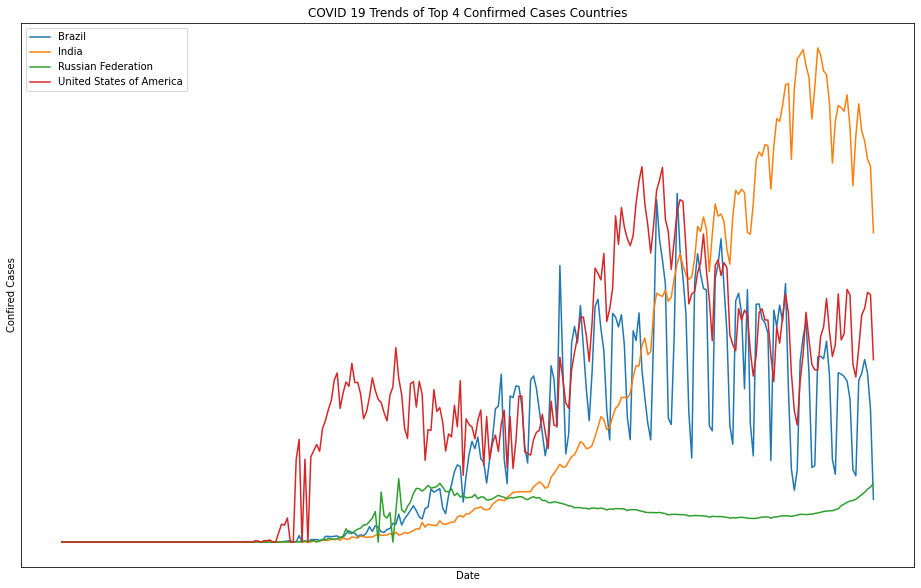

In [5]:
# 데이터 대락젹인 개요 그래프


plot_countries = corona_df.loc[corona_df.Cumulative_cases >= 1000000].Country.unique().tolist()

print(plot_countries)

x = corona_df.Date_reported.unique().tolist()

fig, ax = plt.subplots(figsize = (16,10) )

for country in plot_countries:
  plt.plot(x, corona_df.loc[corona_df.Country == country]['New_cases'], label = country)

plt.xticks([], [])

plt.yticks([], [])

plt.title('COVID 19 Trends of Top 4 Confirmed Cases Countries')

plt.xlabel('Date')

plt.ylabel('Confired Cases')

plt.legend()

In [6]:
# 국가별 총 확진자수
df_covid = corona_df.groupby(['Country', 'Country_code'])\
                    .sum()\
                    .rename_axis(['Country', 'Country_code'])\
                    .reset_index()
df_covid = df_covid.iloc[:,:3]
df_covid.columns = ['국가', '국가코드', '확진자 수']
df_covid.head()

,국가,국가코드,확진자 수
0,Afghanistan,AF,39422
1,Albania,AL,14410
2,Algeria,DZ,52270
3,American Samoa,AS,0
4,Andorra,AD,2370


In [7]:
# Big 5 성격테스트에서 Postive 와 Negative 문제 나누기 + 필요한 열 정의
pos_questions = [
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7 개방성
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6 성실성
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5 외향성
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6 친화성
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8 안정성(신경성)
]

neg_questions = [
    'OPN2','OPN4','OPN6',                # 3 개방성
    'CSN2','CSN4','CSN6','CSN8',         # 4 성실성
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5 외향성
    'AGR1','AGR3','AGR5','AGR7',         # 4 친화성
    'EST2','EST4',                       # 2 안정성(신경성)
]

use_cols = ['country'] + pos_questions + neg_questions 

In [8]:
# Big Five Personality Test Import 
trait = pd.read_csv('data-final.csv', sep = '\t', usecols=use_cols)

In [9]:
# 값이 0인 경우 NaN 처리 + 해당 row 삭제
trait = trait.replace(0,np.NaN).dropna(axis = 0).reset_index(drop = True)

In [10]:
# Country None 인 경우 삭제
trait = trait.loc[trait.country != 'NONE']

In [11]:
# 데이터의 크기가 충분한 국가만 추출
train_countries = pd.DataFrame(data = trait.groupby('country')\
                                           .agg('size')\
                                           .loc[trait.groupby('country').agg('size') > 1000])

train_countries = train_countries.index.to_list()
print(train_countries)
len(train_countries)

['AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO', 'CZ', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HK', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IT', 'JP', 'KE', 'KR', 'MX', 'MY', 'NL', 'NO', 'NZ', 'PE', 'PH', 'PK', 'PL', 'PT', 'RO', 'RS', 'RU', 'SE', 'SG', 'TH', 'TR', 'US', 'VN', 'ZA']


51

In [12]:
# train 데이터와 test 데이터 
train = trait.loc[trait.country.isin(train_countries)].reset_index(drop = True)
test = trait.loc[~trait.country.isin(train_countries)].reset_index(drop = True)

In [13]:
# train 국가 수 확인
print(len(train['country'].unique()))

51


In [14]:
# test 국가 수 확인
print(len(test['country'].unique()))

171


In [15]:
train.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY


In [16]:
test.head(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,3.0,3.0,2.0,3.0,3.0,2.0,4.0,3.0,3.0,5.0,4.0,3.0,4.0,1.0,2.0,3.0,5.0,4.0,4.0,5.0,2.0,5.0,3.0,4.0,2.0,3.0,1.0,3.0,4.0,2.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,UA
1,2.0,1.0,3.0,3.0,5.0,2.0,4.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,2.0,4.0,1.0,4.0,4.0,5.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,1.0,2.0,5.0,5.0,5.0,1.0,2.0,4.0,2.0,4.0,3.0,OM


In [17]:
# test 데이터 또한 샘플이 최소 500개는 가지도록 
test_countries = test.groupby('country').size()\
                     .loc[test.groupby('country').size() > 500]\
                     .index.to_list()

test = test.loc[test.country.isin(test_countries)]
print(len(test.country.unique()))

16


In [18]:
# 평균 계산을 위해 negative question 점수 scale 바꾸기
train[neg_questions] = train[neg_questions].apply(lambda x: 6 - x)
test[neg_questions] = test[neg_questions].apply(lambda x: 6 - x)

In [19]:
df_train = train.copy()
df_test = test.copy()

In [20]:
# 같은 성향의 문제 열끼리 합
def summing_axis (df):
  traits = ['OPN','CSN','EXT','AGR','EST']
  for trait in traits:
    df[trait] = df[[col for col in df.columns if trait in col]].sum(axis = 1)
  return df[traits+['country']]
  

In [21]:
df_train = summing_axis(df_train)
df_test = summing_axis(df_test)

In [22]:
print(len(df_train.country.unique()))

51


In [23]:
print(len(df_test.country.unique()))

16


In [24]:
df_test.head(2)

,OPN,CSN,EXT,AGR,EST,country
0,50.0,24.0,29.0,37.0,39.0,UA
4,32.0,28.0,36.0,41.0,19.0,NG


In [25]:
# 나라별로 train data mean 구하기
mean_train = df_train.groupby('country').mean().rename_axis('country').reset_index()
mean_train.columns = ['국가코드', '개방성', '성실성', '외향성', '우호성', '안정성']
mean_train.head()

,국가코드,개방성,성실성,외향성,우호성,안정성
0,AE,37.639791,34.032090,30.261933,37.917770,31.475732
1,AR,40.133075,31.678530,28.345068,36.416248,32.381431
2,AT,40.836251,32.518538,29.899588,36.876931,29.856334
3,AU,38.551472,33.626061,29.937915,37.918328,30.393272
4,BE,39.308450,32.029262,29.967453,37.661989,30.598089


In [26]:
print(len(mean_train['국가코드'].unique()))

51


In [27]:
# 나라별로 test data mean 구하기
mean_test = df_test.groupby('country').mean().rename_axis('country').reset_index()
mean_test.columns = ['국가코드', '개방성', '성실성', '외향성', '우호성', '안정성']
mean_test.head()

,국가코드,개방성,성실성,외향성,우호성,안정성
0,CR,39.633028,32.664220,28.759633,35.908257,31.051376
1,EC,38.383138,31.910352,29.119530,35.337247,31.806830
2,EE,38.964045,32.362921,28.283146,35.783146,30.279775
3,EG,37.943890,33.007481,28.480050,36.966334,33.011222
4,IS,39.057728,32.614525,30.225326,37.696462,30.463687


In [28]:
print(len(mean_test['국가코드'].unique()))

16


In [29]:
# train 데이터 필터링
train_covid = df_covid.loc[df_covid['국가코드'].isin(train_countries)].reset_index(drop = True)
train_covid.head()

,국가,국가코드,확진자 수
0,Argentina,AR,798486
1,Australia,AU,27149
2,Austria,AT,49886
3,Belgium,BE,132109
4,Brazil,BR,4915289


In [30]:
print(len(train_covid['국가'].unique()))

50


In [31]:
# 빅 파이브 성격테스트와 COVID19 데이터 합치기
df_train = train_covid.merge(mean_train, on = '국가코드')
df_train.head()

,국가,국가코드,확진자 수,개방성,성실성,외향성,우호성,안정성
0,Argentina,AR,798486,40.133075,31.678530,28.345068,36.416248,32.381431
1,Australia,AU,27149,38.551472,33.626061,29.937915,37.918328,30.393272
2,Austria,AT,49886,40.836251,32.518538,29.899588,36.876931,29.856334
3,Belgium,BE,132109,39.308450,32.029262,29.967453,37.661989,30.598089
4,Brazil,BR,4915289,40.536946,31.240467,26.505017,34.946725,31.545703


In [32]:
len(df_train)

50

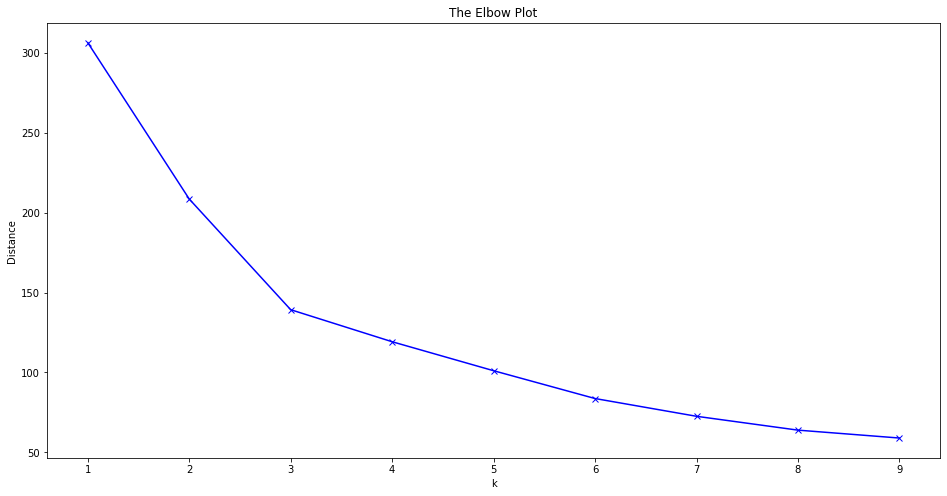

In [47]:
# elbow plot
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_train.iloc[:,3:8])
    distortions.append(kmeanModel.inertia_)
   

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('The Elbow Plot')
plt.show()

In [34]:
# k에 따른 분포 비교

for k in range(2,5):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_train.iloc[:,3:8])
    df_train['군집'] = kmeanModel.labels_
    print('k = ', k)
    print(df_train['군집'].value_counts(),'\n')

k =  2
0    26
1    24
Name: 군집, dtype: int64 

k =  3
0    23
1    15
2    12
Name: 군집, dtype: int64 

k =  4
0    23
1    15
3     7
2     5
Name: 군집, dtype: int64 



In [35]:
#k = 2로 설정
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_train.iloc[:,3:8])
df_train['군집'] = kmeans.labels_
df_train.head()

,국가,국가코드,확진자 수,개방성,성실성,외향성,우호성,안정성,군집
0,Argentina,AR,798486,40.133075,31.678530,28.345068,36.416248,32.381431,1
1,Australia,AU,27149,38.551472,33.626061,29.937915,37.918328,30.393272,0
2,Austria,AT,49886,40.836251,32.518538,29.899588,36.876931,29.856334,0
3,Belgium,BE,132109,39.308450,32.029262,29.967453,37.661989,30.598089,0
4,Brazil,BR,4915289,40.536946,31.240467,26.505017,34.946725,31.545703,1


In [36]:
# label별 case 확인

print('군집 0의 수 : ', len(df_train.loc[df_train['군집'] == 0]))

print('군집 1의 수 : ', len(df_train.loc[df_train['군집'] == 1]))

군집 0의 수 :  26
군집 1의 수 :  24


In [37]:
# 인도와 미국의 확진자수를 Outlier 취급

i = df_train.loc[(df_train['국가'] == 'India') | (df_train['국가'] == 'United States of America')].index

df_train.drop(i, inplace=True)

In [38]:
# 군집별 분류
traits = ['개방성','성실성','외향성','우호성','안정성']

train_res = df_train.iloc[:, 2:]\
                    .groupby('군집')\
                    .mean()\
                    .rename_axis('군집')\
                    .reset_index()
train_res = train_res.apply(lambda x: x.round(2))
train_res = train_res.sort_values('확진자 수', ascending=False).reset_index(drop=True)
train_res

,군집,확진자 수,개방성,성실성,외향성,우호성,안정성
0,1,512379.08,39.65,32.13,28.48,35.84,31.62
1,0,168060.58,38.62,33.39,29.80,37.43,30.49


In [39]:
# test 나라들의 데이터 적용
mean_test['군집'] = kmeans.predict(mean_test.iloc[:,1:])
mean_test.head()

,국가코드,개방성,성실성,외향성,우호성,안정성,군집
0,CR,39.633028,32.664220,28.759633,35.908257,31.051376,1
1,EC,38.383138,31.910352,29.119530,35.337247,31.806830,1
2,EE,38.964045,32.362921,28.283146,35.783146,30.279775,1
3,EG,37.943890,33.007481,28.480050,36.966334,33.011222,1
4,IS,39.057728,32.614525,30.225326,37.696462,30.463687,0


In [40]:
df_test.head(2)

,OPN,CSN,EXT,AGR,EST,country
0,50.0,24.0,29.0,37.0,39.0,UA
4,32.0,28.0,36.0,41.0,19.0,NG


In [41]:
# 군집별 분류
df_test = mean_test.merge(df_covid, on = '국가코드')


test_res = df_test.loc[:, ['군집', '확진자 수'] + traits]\
                    .groupby('군집')\
                    .mean()\
                    .rename_axis('군집')\
                    .reset_index()

test_res = test_res.apply(lambda x: x.round(2))

test_res = test_res.sort_values('확진자 수', ascending=False).reset_index(drop=True)
test_res

,군집,확진자 수,개방성,성실성,외향성,우호성,안정성
0,1,100305.4,39.24,32.40,28.40,35.64,31.53
1,0,32628.0,38.57,34.19,29.64,37.93,30.71


In [42]:
train_res.iloc[0,1]/train_res.iloc[1,1]

3.04877610204606

In [43]:
test_res.iloc[0,1]/test_res.iloc[1,1]

3.074212332965551

In [44]:
# 최종 결과 시각화

In [45]:
final_df = pd.concat([train_res, test_res], axis = 0)

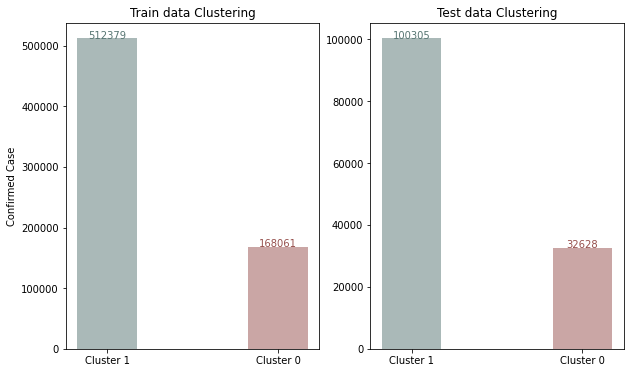

In [46]:
fig, axes = plt.subplots(1,2, figsize=(10, 6))

bar_width = 0.35

alpha = 0.5

index = np.arange(2)

y1 = train_res['확진자 수']

y2 = test_res['확진자 수']

p1 = axes[0].bar(index, y1, 

             bar_width, 

             color=['#567572FF', '#964F4CFF'],

             alpha=alpha,

             label='Train')
axes[0].set_xticks(index)
axes[0].set_xticklabels(['Cluster 1', 'Cluster 0'])
axes[0].set_ylabel('Confirmed Case')

axes[0].set_title('Train data Clustering')

p2 = axes[1].bar(index, y2, 

             bar_width, 

             color=['#567572FF', '#964F4CFF'], 

             alpha=alpha,

             label='Test')


axes[1].set_xticks(index)
axes[1].set_xticklabels(['Cluster 1', 'Cluster 0'])

axes[0].annotate(str(int(round(y1[0], 0))), xy=(0, y1[0]), fontsize=10, ha='center', color = '#567572FF') 
axes[0].annotate(str(int(round(y1[1], 0))), xy=(1, y1[1]), fontsize=10, ha='center', color = '#964F4CFF') 
axes[1].annotate(str(int(round(y2[0], 0))), xy=(0, y2[0]), fontsize=10, ha='center', color = '#567572FF') 
axes[1].annotate(str(int(round(y2[1], 0))), xy=(1, y2[1]), fontsize=10, ha='center', color = '#964F4CFF') 

plt.title('Test data Clustering')

plt.show()


